In [81]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso, LassoCV, LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import (GridSearchCV, cross_val_score,
                                     train_test_split)
from sklearn.preprocessing import StandardScaler

In [82]:
# for Jupyter-book, we copy data from GitHub, locally, to save Internet traffic,
# you can specify the data/ folder from the root of your cloned
# https://github.com/Yorko/mlcourse.ai repo, to save Internet traffic
DATA_PATH = "https://raw.githubusercontent.com/Yorko/mlcourse.ai/main/data/"

In [83]:
data = pd.read_csv(DATA_PATH + "winequality-white.csv", sep=";")

In [84]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [85]:
y = data['quality']

X_train, X_Holdout, y_train, y_holdout = train_test_split(data.drop('quality',axis=1), y,
                                                          test_size=0.3,
                                                          random_state=17)

In [86]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_holdout_scaled = scaler.fit_transform(X_Holdout)

In [87]:
linreg = LinearRegression()
linreg.fit(X_train_scaled, y_train)

LinearRegression()

In [88]:
train_predictions = linreg.predict(X_train_scaled)
holdout_predictions = linreg.predict(X_holdout_scaled)

In [89]:
print(mean_squared_error(train_predictions, y_train),
      mean_squared_error(holdout_predictions, y_holdout))

0.5580606489803572 0.5820851719476798


In [90]:
np.argmax(linreg.coef_)

3

In [91]:
np.argmin(linreg.coef_)

7

In [92]:
X_train.columns[7]

'density'

In [93]:
linreg.coef_

array([ 9.78219223e-02, -1.92259947e-01, -1.83224449e-04,  5.38164096e-01,
        8.12724353e-03,  4.21804406e-02,  1.43040227e-02, -6.65720472e-01,
        1.50036006e-01,  6.20533605e-02,  1.29533447e-01])

## **LASSO Regression**
Lasso model with $a$=0.01 (weak regularization) and scaled data.

In [94]:
lasso1 = Lasso(alpha=0.01, random_state=17)
lasso1.fit(X_train_scaled, y_train)

Lasso(alpha=0.01, random_state=17)

In [95]:
np.argmin(abs(lasso1.coef_))

0

In [96]:
X_train.columns[0]

'fixed acidity'

In [97]:
alphas = np.logspace(-6, 2, 200)
lasso_cv = LassoCV(alphas=alphas, cv=5)
lasso_cv.fit(X_train_scaled, y_train)

LassoCV(alphas=array([1.00000000e-06, 1.09698580e-06, 1.20337784e-06, 1.32008840e-06,
       1.44811823e-06, 1.58856513e-06, 1.74263339e-06, 1.91164408e-06,
       2.09704640e-06, 2.30043012e-06, 2.52353917e-06, 2.76828663e-06,
       3.03677112e-06, 3.33129479e-06, 3.65438307e-06, 4.00880633e-06,
       4.39760361e-06, 4.82410870e-06, 5.29197874e-06, 5.80522552e-06,
       6.36824994e-06, 6.98587975e-0...
       1.18953407e+01, 1.30490198e+01, 1.43145894e+01, 1.57029012e+01,
       1.72258597e+01, 1.88965234e+01, 2.07292178e+01, 2.27396575e+01,
       2.49450814e+01, 2.73644000e+01, 3.00183581e+01, 3.29297126e+01,
       3.61234270e+01, 3.96268864e+01, 4.34701316e+01, 4.76861170e+01,
       5.23109931e+01, 5.73844165e+01, 6.29498899e+01, 6.90551352e+01,
       7.57525026e+01, 8.30994195e+01, 9.11588830e+01, 1.00000000e+02]),
        cv=5)

In [98]:
lasso_cv.alpha_

0.0002833096101839324

In [99]:
X_train.columns[np.argmin(abs(lasso_cv.coef_))]

'citric acid'

In [100]:
train_predictions = lasso_cv.predict(X_train_scaled)
holdout_predictions = lasso_cv.predict(X_holdout_scaled)

In [101]:
print(mean_squared_error(train_predictions, y_train),
      mean_squared_error(holdout_predictions, y_holdout))

0.558070014187378 0.5812505235389446


## **Random Forest**

In [102]:
forest = RandomForestRegressor(random_state=17)
forest.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=17)

In [103]:
train_predictions = forest.predict(X_train_scaled)
holdout_predictions = forest.predict(X_holdout_scaled)

cv_mse = cross_val_score(forest, X_train_scaled, y_train, scoring='neg_mean_squared_error')

In [104]:
print(mean_squared_error(train_predictions, y_train),
      mean_squared_error(holdout_predictions, y_holdout),
      cv_mse.mean())

0.05261155192532089 0.41078 -0.4142003732204039


In [107]:
forest_params = {"max_depth": list(range(10, 25)), "max_features": list(range(6, 12))}

locally_best_forest = GridSearchCV(
    RandomForestRegressor(n_jobs=-1, random_state=17),
    forest_params,
    scoring="neg_mean_squared_error",
    n_jobs=-1,
    cv=5,
    verbose=True,
)
locally_best_forest.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=-1, random_state=17),
             n_jobs=-1,
             param_grid={'max_depth': [10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
                                       20, 21, 22, 23, 24],
                         'max_features': [6, 7, 8, 9, 10, 11]},
             scoring='neg_mean_squared_error', verbose=True)

In [108]:
locally_best_forest.best_params_, locally_best_forest.best_score_

({'max_depth': 21, 'max_features': 6}, -0.39773288191505934)

In [110]:
print(
    np.mean(
        np.abs(
            cross_val_score(
                locally_best_forest.best_estimator_,
                X_train_scaled,
                y_train,
                scoring="neg_mean_squared_error",
            )
        )
    )
)
print(mean_squared_error(y_holdout, locally_best_forest.predict(X_holdout_scaled)))

0.39773288191505934
0.4022405910862694


In [113]:
X_train.columns[np.argmax((locally_best_forest.best_estimator_.feature_importances_))]

'alcohol'

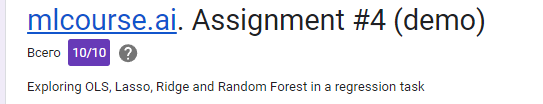

LEEET'S GOOOO!!!

<img src='https://media2.giphy.com/media/v1.Y2lkPTc5MGI3NjExbXl6d2UyanU1OGUwN3Zpbng2cXZ0cDI1MzB5YjNvYXJkcnZsODZuNyZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9cw/WNcb7X5QHgr9cqWm1S/giphy.gif' width=50%>